In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./2021.csv').drop('Unnamed: 0', axis=1)
data['Date'] = pd.to_datetime(data['Date'])
group = data.groupby([data['Date'].dt.date])

In [3]:
sentiment = pd.concat([group.mean(), group.count()['Date']], axis=1).rename(columns={'Sentiment': 'avg_polar', 'Date': 'tweet_count'})
sentiment

,avg_polar,tweet_count
Date,,
2021-01-01,0.582192,146
2021-01-02,0.715232,151
2021-01-03,0.668182,220
2021-01-04,0.715789,285
2021-01-05,0.729469,207
...,...,...
2021-12-27,0.663551,107
2021-12-28,0.606383,94
2021-12-29,0.612069,116


In [4]:
def cast_float(x):
    first = float(x[0].replace('.', '').replace(',', '.'))
    second = float(x[1].replace('.', '').replace(',', '.'))
    third = float(x[2].replace('.', '').replace(',', '.').replace('%', ''))
    return pd.Series([first, second, third])

In [5]:
stock = pd.read_csv('../../StockAndTweetDataExtract/Stock_data/THYAO_2021.csv')
stock['Tarih'] = pd.to_datetime(stock['Tarih'], infer_datetime_format=True)
stock.set_index('Tarih', inplace=True)
stock.drop(['Yüksek', 'Düşük', 'Hac.'], axis=1, inplace=True)
stock = stock.apply(lambda x: cast_float(x), axis=1).rename(columns={0: 'şimdi', 1: 'açılış', 2: 'fark'})
stock

,şimdi,açılış,fark
Tarih,,,
2021-12-31,20.02,20.30,-0.60
2021-12-30,20.14,21.42,-4.46
2021-12-29,21.08,20.08,2.93
2021-12-28,20.48,20.86,-1.44
2021-12-27,20.78,21.04,-1.61
...,...,...,...
2021-01-08,12.82,12.75,1.10
2021-01-07,12.68,12.74,-0.08
2021-01-06,12.69,12.73,0.55


In [6]:
merged = stock.merge(sentiment, right_index=True, left_index=True)
merged

,şimdi,açılış,fark,avg_polar,tweet_count
2021-12-31,20.02,20.30,-0.60,0.647059,68
2021-12-30,20.14,21.42,-4.46,0.525926,135
2021-12-29,21.08,20.08,2.93,0.612069,116
2021-12-28,20.48,20.86,-1.44,0.606383,94
2021-12-27,20.78,21.04,-1.61,0.663551,107
...,...,...,...,...,...
2021-01-08,12.82,12.75,1.10,0.711538,260
2021-01-07,12.68,12.74,-0.08,0.684729,203
2021-01-06,12.69,12.73,0.55,0.752577,194
2021-01-05,12.62,12.64,-0.47,0.729469,207


<AxesSubplot:>

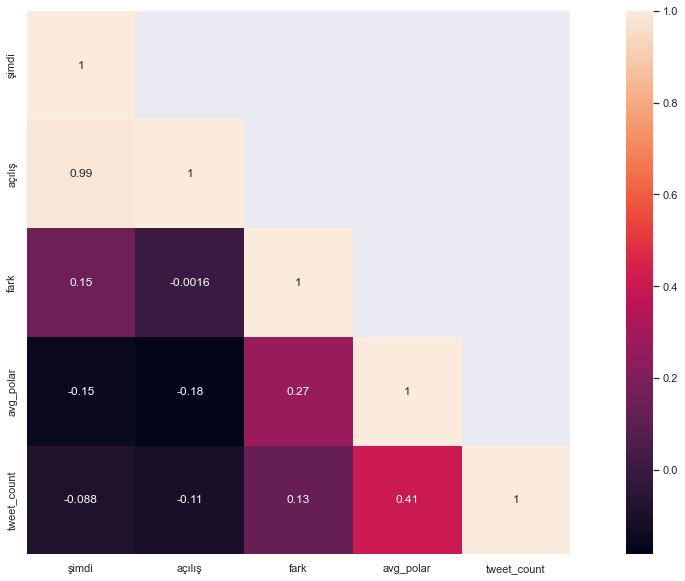

In [7]:
cor_mat= merged.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
sns.set(font_scale=1)
fig.set_size_inches(20,10)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [8]:
merged.to_csv('2021_final.csv')